#Overview of What You'll Learn:

In this tutorial, we will cover the basics of deep learning and neural networks, with a primary focus on feed-forward neural networks. You will learn how to build, train, and evaluate a feed-forward neural network using TensorFlow and Keras. Additionally, we will explore GPU acceleration to speed up the training process.

Understanding TensorFlow:

 TensorFlow allows you to define, optimize, and efficiently compute complex mathematical expressions, making it a powerful tool for deep learning.

Introducing Keras as a High-Level API:

While TensorFlow provides a low-level API for building neural networks, Keras is a high-level API that runs on top of TensorFlow. Keras simplifies the process of defining and training neural networks, making it an excellent choice for beginners and experts alike.

#Installing tensorflow

In [ ]:
#You can install TensorFlow and Keras with pip.
!pip install tensorflow


#Importing Necessary Libraries and Checking TensorFlow Version

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras

# Check TensorFlow version
print("TensorFlow version:", tf.__version__)


# Tensors and their operations
Basic data structure in TensorFlow is tensors (similar to NumPy arrays)

In [ ]:
# Converting Python list into TensorFlow tensor
l = [[1,2], [3,4]]
print(type(l))
x = tf.constant(l, dtype=tf.float32)
print(x)

In [ ]:
# Converting NumPy array into TensorFlow tensor
import numpy as np
n_l = np.array([[1,2], [3,4]], dtype=np.float32)
print(type(n_l))
x = tf.constant(n_l)
print(x)

In [ ]:
# Random initialization
x = tf.random.uniform((10, 3))
print(type(x))
print(x)

In [ ]:
# Properties of tensors
x = tf.random.uniform((2, 4, 3))
print(x)
print("Shape of x:", x.shape)


In [ ]:
x.shape

In [ ]:
# Reshaping
x_flat = tf.reshape(x, [24])
print("x_flat:", x_flat)
print()
x_reshaped = tf.reshape(x, [8, 3])
print("x_reshaped:", x_reshaped)
print()
x_reshaped = tf.reshape(x, [2, 12])
print("x_reshaped:", x_reshaped)
print()
x_reshaped = tf.reshape(x, [6, 4])
print("x_reshaped:", x_reshaped)
print()

In [ ]:
# Slicing
x = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
#It follows (no of rows * no of columns)
print("x:", x)
print()
print("x[0]:", x[0])
print()
print("x[0,:]:", x[0, :])
print()
print("x[:,0]:", x[:, 0])
print()
print("x[:2, :]:", x[:2, :])
print()
print("x[1:, :]:", x[1:, :])
print()
print("x[:, 1:2]:", x[:, 1:2])

In [ ]:
# Derivatives
#TensorFlow provides the tf.GradientTape API for automatic differentiation; that is, computing the gradient of a computation with respect to some inputs.
#TensorFlow "records" relevant operations executed inside the context of a tf.GradientTape onto a "tape".
#TensorFlow then uses that tape to compute the gradients of a "recorded" computation
x = tf.Variable(3.0, trainable=True)
print("x:", x)

with tf.GradientTape() as tape:     #persistent = True for multiple calculating derivatives
    y = x**2
#    z = y*3

grad = tape.gradient(y, x)
#grad_2 = tape.gradient(z, x)
print()
print("grad:", grad)

print()
#print("grad_2:", grad_2)


Sigmoid Activation function

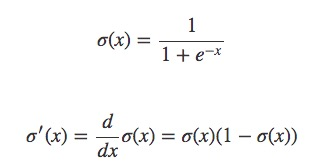

In [ ]:
# Sigmoid
x = tf.Variable(0.0, trainable=True)
print("x:", x)

with tf.GradientTape() as tape:
    y = tf.sigmoid(x)

grad = tape.gradient(y, x)
print()
print("y:", y)
print()
print("grad:", grad)

In [ ]:
# tanh
x = tf.Variable(0.0, trainable=True)
print("x:", x)

with tf.GradientTape() as tape:
    y = tf.tanh(x)

grad = tape.gradient(y, x)
print()
print("y:", y)
print()
print("grad:", grad)

#Loading a Dataset (e.g., MNIST) using Keras

##### Operations of tensors

In [ ]:
# Keras provides convenient functions to load popular datasets.
#In this tutorial, we'll use the MNIST dataset, a collection of handwritten digits. You can load it as follows:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#The train_images and test_images contain the pixel values of the images, while train_labels and test_labels contain the corresponding labels (digits).

#Preprocessing the Data

In [ ]:
import matplotlib.pyplot as plt
i = 10
plt.imshow(train_images[i])
print("Label:", train_labels[i])
print()

In [ ]:
#Reshaping: Ensure that the input data is in the correct shape.
#For MNIST, each image is 28x28 pixels, so we reshape it to a 1D array of length 784.
# Reshape the data
#Normalization: Scale the pixel values to a range between 0 and 1 by dividing by 255.0 (assuming the original pixel values are in the range 0-255):
train_images = train_images.reshape((-1, 28 * 28)) / 255.0
test_images = test_images.reshape((-1, 28 * 28)) / 255.0

#One-Hot Encoding (if needed): In the case of MNIST, the labels are integers representing the digit from 0 to 9.
#To prepare them for training, we can one-hot encode the labels.
train_labels = keras.utils.to_categorical(train_labels, 10)
test_labels = keras.utils.to_categorical(test_labels, 10)

#Defining a Simple Feed-Forward Neural Network Using Keras

In [ ]:
#Let's start building our first neural network using Keras.
#In the code snippet below, we define a simple feed-forward neural network with three layers:
#an input layer, a hidden layer with ReLU activation, and an output layer with softmax activation.

model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()


In [ ]:
# # Define the model using TensorFlow's low-level API
# class CustomModel(tf.Module):
#     def __init__(self):
#         # Define the layers
#         self.dense1 = tf.keras.layers.Dense(128, activation='relu')
#         self.dense2 = tf.keras.layers.Dense(64, activation='relu')
#         self.dense3 = tf.keras.layers.Dense(10, activation='softmax')

#     def __call__(self, x):
#         # Define the forward pass
#         x = self.dense1(x)
#         x = self.dense2(x)
#         x = self.dense3(x)
#         return x

# # Create an instance of the custom model
# model = CustomModel()

# # Optional: You can specify the input shape when you call the model for the first time
# # This will initialize the weights
# input_shape = (None, 784)  # None allows variable batch sizes
# model(tf.ones(input_shape))

# # Print a summary of the model
# model.summary()


#Compiling the Model

In [ ]:
# After defining the architecture and specifying activation functions, loss functions, and optimizers, we need to compile the model using the following code.
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


#Demonstrating Training on CPU

In [ ]:
# # Define callbacks
# from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping,  ReduceLROnPlateau
# checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True, monitor='val_loss', verbose=1)
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# # Combine all the callbacks in a list
# callbacks = [checkpoint, early_stopping, reduce_lr]

In [ ]:
#In this code, we use the fit method to train the model.
#We specify the training data (train_images and train_labels), the number of epochs (10 in this case), and the batch size (64).
#The validation_split argument splits a portion of the training data for validation during training, helping us monitor the model's performance.

history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)


#Checking GPU Availability

In [ ]:
# Check if GPU is available
gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    print("Name:", gpu.name, "  Type:", gpu.device_type)
if len(gpus)>0:
    print("GPU is available.")
else:
    print("GPU is not available. Training on CPU.")


#Running Training on GPU

In [ ]:
# Check if GPU is available
if tf.config.list_physical_devices('GPU'):
    print("GPU is available.")
    with tf.device("GPU:0"):  # Use the first GPU (if multiple are available)
        # Train the model (GPU)
        history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)
else:
    print("GPU is not available. Training on CPU.")
    # Train the model on CPU (if GPU is not available)
    history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)


#Evaluating the Model on Test Data

In [ ]:
#Once your model is trained, you need to evaluate its performance on a separate test dataset to assess its accuracy and other relevant metrics.
#You can use the following code for evaluation

test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_accuracy)


#Calculating Relevant Metrics

In [ ]:
#In addition to accuracy, you may want to calculate other relevant metrics such as
#precision, recall, F1-score, or confusion matrices depending on the nature of your classification problem.
#You can use libraries like scikit-learn to calculate these metrics if needed:

from sklearn.metrics import classification_report, confusion_matrix

# Get model predictions
predictions = model.predict(test_images)
print("predictions:", predictions)

# Convert one-hot encoded labels back to integers
true_labels = test_labels.argmax(axis=1)
predicted_labels = predictions.argmax(axis=1)

# Calculate and print classification report and confusion matrix
print("Classification Report:\n", classification_report(true_labels, predicted_labels))
print("Confusion Matrix:\n", confusion_matrix(true_labels, predicted_labels))
